In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import timedelta
import scipy.stats as st
from geopy.geocoders import ArcGIS

# Data Preprcessing

In [2]:
# zone = pd.read_csv("taxi+_zone_lookup.csv")
# nom = ArcGIS(timeout = 5)
# lat = []
# long = []
# for i in zone.Zone:
#   lat.append(nom.geocode(i)[1][0])
#   long.append(nom.geocode(i)[1][1])
# zone['latitude'] = lat
# zone['longitude'] = long
# zone.to_csv('zone.csv', index=False)


In [3]:
zone = pd.read_csv('zone.csv').drop(['Unnamed: 0'],axis=1)

In [4]:
zone

,LocationID,Borough,Zone,service_zone,latitude,longitude
0,1,EWR,Newark Airport,EWR,40.692440,-74.182960
1,2,Queens,Jamaica Bay,Boro Zone,40.603990,-73.835410
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone,40.865210,-73.843070
3,4,Manhattan,Alphabet City,Yellow Zone,40.725990,-73.980570
4,5,Staten Island,Arden Heights,Boro Zone,40.554140,-74.173910
...,...,...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone,33.767900,-118.199400
261,262,Manhattan,Yorkville East,Yellow Zone,43.670760,-79.392850
262,263,Manhattan,Yorkville West,Yellow Zone,41.690003,-88.430049
263,264,Unknown,NV,NaN,39.356482,-116.655436


In [5]:
df_2021_06 = pd.read_parquet('yellow_tripdata_2021-06.parquet')
df_2021_07 = pd.read_parquet('yellow_tripdata_2021-07.parquet')
df_2021_08 = pd.read_parquet('yellow_tripdata_2021-08.parquet')
df_2022_06 = pd.read_parquet('yellow_tripdata_2022-06.parquet')
df_2022_07 = pd.read_parquet('yellow_tripdata_2022-07.parquet')
df_2022_08 = pd.read_parquet('yellow_tripdata_2022-08.parquet')

## Handeling missing and merge data

In [6]:
def merge_data(df):
    temp_df = zone.copy()
    temp_df.rename(columns = {'LocationID':"PULocationID"},inplace=True )
    df = df.merge(temp_df,on='PULocationID')
    df.rename(columns = {'latitude':"PUlatitude", 'longitude':"PUlongitude"},inplace=True )
    temp_df2 = zone.copy()
    temp_df2.rename(columns = {'LocationID':"DOLocationID"},inplace=True )
    df = df.merge(temp_df2,on='DOLocationID')
    df.rename(columns = {'latitude':"DOlatitude", 'longitude':"DOlongitude"},inplace=True )
    df['time_taken'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
    df['time_taken'] = [timedelta.Timedelta(x).total.seconds for x in df['time_taken']]
    df['time_taken'] = round((df['time_taken']/60),2)
    df['speed(miles/hours)'] =round((df['trip_distance'])/(df['time_taken']/60),2)
    return df[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance','time_taken', 'speed(miles/hours)','store_and_fwd_flag','PUlatitude', 'PUlongitude', 'DOlatitude', 'DOlongitude',
        'payment_type', 'fare_amount', 'extra','mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge','total_amount', 'congestion_surcharge', 'airport_fee']]



In [7]:
data_2021_06 = merge_data(df_2021_06)

In [8]:
data_2021_07 = merge_data(df_2021_07)

In [9]:
data_2021_08 = merge_data(df_2021_08)

In [10]:
data_2022_06 = merge_data(df_2022_06)

In [11]:
data_2022_07 = merge_data(df_2022_07)

In [12]:
data_2022_08 = merge_data(df_2022_08)

In [13]:
def na_value(data):
    return round(((data.isna().sum()[data.isna().sum()>0])/len(data))*100,2)

In [14]:
print('Missing value of data_2021_06 is: ')
print(na_value(data_2021_06))
print("-.-"*60)
print('Missing value of data_2021_07 is: ')
print(na_value(data_2021_07))
print("-.-"*60)
print('Missing value of data_2021_08 is: ')
print(na_value(data_2021_08))
print("-.-"*60)
print('Missing value of data_2022_06 is: ')
print(na_value(data_2022_06))
print("-.-"*60)
print('Missing value of data_2022_07 is: ')
print(na_value(data_2022_07))
print("-.-"*60)
print('Missing value of data_2022_08 is: ')
print(na_value(data_2022_08))
print("-.-"*60)

Missing value of data_2021_06 is: 
passenger_count         4.36
speed(miles/hours)      0.07
store_and_fwd_flag      4.36
congestion_surcharge    4.36
airport_fee             4.36
dtype: float64
-.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.-
Missing value of data_2021_07 is: 
passenger_count         4.63
speed(miles/hours)      0.09
store_and_fwd_flag      4.63
congestion_surcharge    4.63
airport_fee             4.63
dtype: float64
-.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.-
Missing value of data_2021_08 is: 
passenger_count         4.86
speed(miles/hours)      0.08
store_and_fwd_flag      4.86
congestion_surcharge    4.86
airport_fee             4.86
dtype: float64
-.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.

In [15]:
def drop_na(df):
    return df.dropna(axis=0, inplace=True)

In [16]:
drop_na(data_2021_06)

In [17]:
drop_na(data_2021_07)

In [18]:
drop_na(data_2021_08)

In [19]:
drop_na(data_2022_06)

In [20]:
drop_na(data_2022_07)

In [21]:
drop_na(data_2022_08)

In [22]:
data_records = [data_2021_06,data_2021_07,data_2021_08,data_2022_06,data_2022_07,data_2022_08]

## Pickup time and Dropoff Time

In [23]:
def error_date(df):
    x = df[(df['tpep_pickup_datetime'] < '2021-06-01 00:00:00') | (df['tpep_pickup_datetime'] > '2022-08-31 23:59:59')]
    return len(x)

In [24]:
for i in data_records:
    print(error_date(i))

61
61
49
447
9
24


In [25]:
def fix_date(df):
    x = df[(df['tpep_pickup_datetime'] > '2021-06-01 00:00:00') | (df['tpep_pickup_datetime'] < '2022-08-31 23:59:59')]
    return x

In [26]:
data_2021_06 = fix_date(data_2021_06)
data_2021_07 = fix_date(data_2021_07)
data_2021_08 = fix_date(data_2021_08)
data_2022_06 = fix_date(data_2022_06)
data_2022_07 = fix_date(data_2022_07)
data_2022_08 = fix_date(data_2022_08)

## Passenger

In [27]:
# counter = 0
# plt.figure(figsize=(12,9))
# for i in data_records:
#     data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
#     counter = counter + 1
#     plt.subplot(2,3,counter)
#     # val = round((i['passenger_count'].value_counts()/len(i)*100),2)
#     # bars = plt.bar(i['passenger_count'].value_counts().index,val)
#     plt.boxplot(i['passenger_count'])
#     plt.tight_layout() 
#     plt.title("{}".format(data_name[counter-1]))
#     plt.xlabel('Number of passenger')
#     plt.ylabel('Total number of Customer in %')

In [28]:
def outlier_passenger(Number_of_passenger):
    counter = 0
    data_records = [data_2021_06,data_2021_07,data_2021_08,data_2022_06,data_2022_07,data_2022_08]
    for i in data_records:
        counter = counter + 1
        x = len(i[i['passenger_count'] == Number_of_passenger])
        data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
        per_outlier = (x/i.shape[0])*100
        print('{} ---- Number of outlier data is {} and in percentage is {} %'.format(data_name[counter-1], (x),round(per_outlier,2)))

In [29]:
outlier_passenger(4)

data_2021_06 ---- Number of outlier data is 40931 and in percentage is 1.51 %
data_2021_07 ---- Number of outlier data is 50601 and in percentage is 1.88 %
data_2021_08 ---- Number of outlier data is 46870 and in percentage is 1.77 %
data_2022_06 ---- Number of outlier data is 62314 and in percentage is 1.82 %
data_2022_07 ---- Number of outlier data is 72121 and in percentage is 2.35 %
data_2022_08 ---- Number of outlier data is 68787 and in percentage is 2.25 %


In [30]:
outlier_passenger(5)

data_2021_06 ---- Number of outlier data is 67677 and in percentage is 2.5 %
data_2021_07 ---- Number of outlier data is 71743 and in percentage is 2.67 %
data_2021_08 ---- Number of outlier data is 68858 and in percentage is 2.6 %
data_2022_06 ---- Number of outlier data is 58894 and in percentage is 1.72 %
data_2022_07 ---- Number of outlier data is 54138 and in percentage is 1.76 %
data_2022_08 ---- Number of outlier data is 55734 and in percentage is 1.82 %


In [31]:
outlier_passenger(3)

data_2021_06 ---- Number of outlier data is 108580 and in percentage is 4.01 %
data_2021_07 ---- Number of outlier data is 116291 and in percentage is 4.33 %
data_2021_08 ---- Number of outlier data is 110306 and in percentage is 4.16 %
data_2022_06 ---- Number of outlier data is 141300 and in percentage is 4.13 %
data_2022_07 ---- Number of outlier data is 140104 and in percentage is 4.57 %
data_2022_08 ---- Number of outlier data is 135986 and in percentage is 4.45 %


In [34]:
outlier_passenger(0)

data_2021_06 ---- Number of outlier data is 66501 and in percentage is 2.46 %
data_2021_07 ---- Number of outlier data is 66720 and in percentage is 2.48 %
data_2021_08 ---- Number of outlier data is 72761 and in percentage is 2.74 %
data_2022_06 ---- Number of outlier data is 68589 and in percentage is 2.0 %
data_2022_07 ---- Number of outlier data is 63254 and in percentage is 2.06 %
data_2022_08 ---- Number of outlier data is 60355 and in percentage is 1.97 %


In [35]:
# counter = 0
# plt.figure(figsize=(12,9))
# for i in data_records:
#     data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
#     counter = counter + 1
#     plt.subplot(2,3,counter)
#     val = round((i['passenger_count'].value_counts()/len(i)*100),2)
#     bars = plt.bar(i['passenger_count'].value_counts().index,val)
#     plt.bar_label(bars)
#     plt.tight_layout() 
#     plt.title("{}".format(data_name[counter-1]))
#     plt.xlabel('Number of passenger')
#     plt.ylabel('Total number of Customer in %')
    

In [36]:
def outliers(df):
    return df[(df['passenger_count']<=4) | df['passenger_count'] > 0]

In [37]:
data_2021_06 = outliers(data_2021_06)
data_2021_07 = outliers(data_2021_07)
data_2021_08 = outliers(data_2021_08)
data_2022_06 = outliers(data_2022_06)
data_2022_07 = outliers(data_2022_07)
data_2022_08 = outliers(data_2022_08)


In [38]:
# counter = 0
# plt.figure(figsize=(13,9))
# data_records = [data_2021_06,data_2021_07,data_2021_08,data_2022_06,data_2022_07,data_2022_08]
# for i in data_records:
    
#     data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
#     counter = counter + 1
#     plt.subplot(2,3,counter)
#     val = round((i['passenger_count'].value_counts()/len(i)*100),2)
#     bars = plt.bar(i['passenger_count'].value_counts().index,val)
#     plt.bar_label(bars)
#     plt.tight_layout() 
#     plt.title("{}".format(data_name[counter-1]))
#     plt.xlabel('Number of passenger')
#     plt.ylabel('Total number of Customer in %')

In [39]:
# counter = 0
# plt.figure(figsize=(13,9))
# data_records = [data_2021_06,data_2021_07,data_2021_08,data_2022_06,data_2022_07,data_2022_08]
# for i in data_records:
#     data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
#     counter = counter + 1
#     plt.subplot(2,3,counter)
#     val = round((i['passenger_count'].value_counts()/len(i)*100),2)
#     plt.pie((i['passenger_count'].value_counts()/len(i)*100), labels=i['passenger_count'].value_counts().index, autopct='%1.1f%%')
#     # plt.bar_label(bars)
#     plt.tight_layout() 
#     plt.legend(i['passenger_count'].value_counts().index)
#     plt.title("{}".format(data_name[counter-1]))
#     plt.xlabel('Number of passenger')
#     plt.ylabel('Total number of Customer in %')

## Trip distance

In [40]:
counter = 0
for i in data_records:
  counter = counter + 1
  data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
  print(" ")
  print("------------ {} -------------".format(data_name[counter-1]))
  print(end=" ")
  print(" ")
  for j in range(0,100,10):
    print("{} perncetile is ".format(j),np.percentile(i['time_taken'],j))
  print("{} perncetile is ".format(100),np.percentile(i['time_taken'],100))
  


 
------------ data_2021_06 -------------
  
0 perncetile is  -459.4
10 perncetile is  4.2
20 perncetile is  5.88
30 perncetile is  7.43
40 perncetile is  9.02
50 perncetile is  10.78
60 perncetile is  12.85
70 perncetile is  15.5
80 perncetile is  19.3
90 perncetile is  26.55
100 perncetile is  3129.48
 
------------ data_2021_07 -------------
  
0 perncetile is  -2325.4
10 perncetile is  4.12
20 perncetile is  5.78
30 perncetile is  7.33
40 perncetile is  8.9
50 perncetile is  10.63
60 perncetile is  12.68
70 perncetile is  15.27
80 perncetile is  19.02
90 perncetile is  26.12
100 perncetile is  3018.62
 
------------ data_2021_08 -------------
  
0 perncetile is  -5750.85
10 perncetile is  4.12
20 perncetile is  5.78
30 perncetile is  7.3
40 perncetile is  8.87
50 perncetile is  10.58
60 perncetile is  12.62
70 perncetile is  15.2
80 perncetile is  18.97
90 perncetile is  26.32
100 perncetile is  7081.27
 
------------ data_2022_06 -------------
  
0 perncetile is  -678.4
10 perncet

In [41]:
counter = 0
for i in data_records:
  counter = counter + 1
  data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
  print("")    
  print("------------ {} -------------".format(data_name[counter-1]))
  print("")  
  print(end=" ")
  for j in range(91,100,1):
    print("{} perncetile is ".format(j),np.percentile(i['time_taken'],j))
  print("{} perncetile is ".format(100),np.percentile(i['time_taken'],100))


------------ data_2021_06 -------------

 91 perncetile is  27.77
92 perncetile is  29.15
93 perncetile is  30.82
94 perncetile is  32.8
95 perncetile is  35.3
96 perncetile is  38.57
97 perncetile is  42.93
98 perncetile is  49.18
99 perncetile is  60.23
100 perncetile is  3129.48

------------ data_2021_07 -------------

 91 perncetile is  27.33
92 perncetile is  28.72
93 perncetile is  30.35
94 perncetile is  32.3
95 perncetile is  34.68
96 perncetile is  37.68
97 perncetile is  41.63
98 perncetile is  47.17
99 perncetile is  56.8
100 perncetile is  3018.62

------------ data_2021_08 -------------

 91 perncetile is  27.58
92 perncetile is  29.05
93 perncetile is  30.78
94 perncetile is  32.9
95 perncetile is  35.43
96 perncetile is  38.6
97 perncetile is  42.53
98 perncetile is  47.77
99 perncetile is  56.53
100 perncetile is  7081.27

------------ data_2022_06 -------------

 91 perncetile is  33.58
92 perncetile is  35.45
93 perncetile is  37.63
94 perncetile is  40.27
95 pernce

In [42]:
counter = 0
for i in data_records:
  counter = counter + 1
  data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
  print("") 
  print("------------ {} -------------".format(data_name[counter-1]))
  print(end=" ")
  print("") 
  for j in np.arange(0.0,1.0,0.1):
    print("{} perncetile is ".format(float(99+j)),np.percentile(i['time_taken'],float(99+j)))
print("{} perncetile is ".format(100),np.percentile(i['time_taken'],100))


------------ data_2021_06 -------------
 
99.0 perncetile is  60.23
99.1 perncetile is  62.0
99.2 perncetile is  64.08
99.3 perncetile is  66.5
99.4 perncetile is  69.38964000000618
99.5 perncetile is  73.2
99.6 perncetile is  78.73
99.7 perncetile is  88.82
99.8 perncetile is  559.2294199999515
99.9 perncetile is  1426.404940000009

------------ data_2021_07 -------------
 
99.0 perncetile is  56.8
99.1 perncetile is  58.35
99.2 perncetile is  60.18
99.3 perncetile is  62.3
99.4 perncetile is  64.97
99.5 perncetile is  68.39750000000001
99.6 perncetile is  73.52
99.7 perncetile is  84.17
99.8 perncetile is  888.975
99.9 perncetile is  1425.361250000014

------------ data_2021_08 -------------
 
99.0 perncetile is  56.53
99.1 perncetile is  57.93
99.2 perncetile is  59.63
99.3 perncetile is  61.6
99.4 perncetile is  64.02
99.5 perncetile is  67.12
99.6 perncetile is  71.68
99.7 perncetile is  80.78
99.8 perncetile is  643.4893200000375
99.9 perncetile is  1423.6509200000019

---------

In [43]:
def fix_distance(df):
    return df[df['trip_distance']<45]

In [44]:
data_2021_06 = fix_distance(data_2021_06)
data_2021_07 = fix_distance(data_2021_07)
data_2021_08 = fix_distance(data_2021_08)
data_2022_06 = fix_distance(data_2022_06)
data_2022_07 = fix_distance(data_2022_07)
data_2022_08 = fix_distance(data_2022_08)

### 95% Confidence Interval

###### This approach is used to calculate confidence Intervals for the large dataset where the n>30, norm.interval() else smaller t.interval()

In [45]:
counter = 0
for i in data_records:
  counter = counter + 1
  data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
  print("") 
  print("------------ {} -------------".format(data_name[counter-1]))
  print(st.norm.interval(alpha=0.95,
				loc=np.mean(i['trip_distance']),
				scale=st.sem(i['trip_distance'])))
print("") 
  



------------ data_2021_06 -------------
(2.9920915819049654, 3.0137325645476096)

------------ data_2021_07 -------------
(3.1940631693001174, 3.204911459376387)

------------ data_2021_08 -------------
(3.308378328700056, 3.323704524460406)

------------ data_2022_06 -------------
(3.5093223697252744, 3.754542063565335)

------------ data_2022_07 -------------
(3.585114884218947, 3.597260990179909)

------------ data_2022_08 -------------
(3.6064771417589996, 3.7580724442611726)



### Chebyshev Inequality Prbability

## $$ (μ−k·σ  < X < μ−k·σ) > 1-(1/k^2) $$

#### Chebbyshev Inequality Probability tells how much of percentage in trip distance range

In [46]:
counter = 0
k=2
print("*"*40)
print(" {}% probalbity fall under in range".format((1-(1/k**2))*100))
print("")
print("*"*40)
for i in data_records:
  counter = counter + 1
  data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
  print("") 
  print("------------ {} -------------".format(data_name[counter-1]))
  print("") 
  mu = i['trip_distance'].mean()
  std = i['trip_distance'].std()
  print(mu-k*std,"-",mu+k*std)  
    

****************************************
 75.0% probalbity fall under in range

****************************************

------------ data_2021_06 -------------

-15.169545705532645 - 21.17536985198522

------------ data_2021_07 -------------

-5.8761764023038605 - 12.275151030980366

------------ data_2021_08 -------------

-9.415689606575963 - 16.047772459736425

------------ data_2022_06 -------------

-227.88827848630777 - 235.1521429195984

------------ data_2022_07 -------------

-7.262914879978285 - 14.44529075437714

------------ data_2022_08 -------------

-131.57633347594088 - 138.94088306196107


#### To check normal distributon or not

In [47]:
# import matplotlib.pylab as pylab
# counter = 0
# plt.figure(figsize=(12,7))
# data_records = [data_2021_06,data_2021_07,data_2021_08,data_2022_06,data_2022_07,data_2022_08]
# for i in data_records:
#     data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
#     counter = counter + 1
#     plt.subplot(2,3,counter)
#     st.probplot(i['trip_distance'], dist="norm", plot=pylab);
#     plt.tight_layout() 
#     plt.title("{}".format(data_name[counter-1]))


In [48]:
# counter = 0
# plt.figure(figsize=(12,7))
# data_records = [data_2021_06,data_2021_07,data_2021_08,data_2022_06,data_2022_07,data_2022_08]
# for i in data_records:
#     data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
#     counter = counter + 1
#     plt.subplot(2,3,counter)
#     sns.distplot(i['trip_distance'])
#     plt.axvline(i['trip_distance'].mean(), color='red', linestyle='--',label='Average')
#     plt.axvline(i['trip_distance'].median(), color='black', linestyle='-',label='Median')
#     plt.tight_layout() 
#     plt.title("{}".format(data_name[counter-1]))
#     plt.xlabel('Distances in Miles')    

In [49]:
# num_bins = 100
# sns.set_style('whitegrid')
# sns.kdeplot(data_2021_06['trip_distance'], color ='black');
# sns.kdeplot(data_2021_07['trip_distance'], color ='green');
# sns.kdeplot(data_2021_08['trip_distance'], color ='red' );
# sns.kdeplot(data_2022_06['trip_distance'], color ='yellow');
# sns.kdeplot(data_2022_07['trip_distance'], color ='cyan');
# sns.kdeplot(data_2022_08['trip_distance'], color ='blue');

### Two Sample KS Test for check same distribution or not
##### we compare the KS Test with  latest dataset with previous year dataset ,  
##### st.kstest(i['trip_distance'],'norm') first is our dataset and second comapare with normal distribution
##### if p>0.05 then normal distribution else not distribution

#### The null hypothesis is rejected at $ \alpha $ if

### $$ D_{n,m}\ \ >\ c\left(\alpha \right)\sqrt{\frac{n+m}{n\cdot m}} $$

##### check lookup table in wiki KS test

In [50]:
import handcalcs.render
from math import sqrt, log

In [51]:
n = len(data_2021_06)
m = len(data_2022_08)

In [52]:
%%render

# (take siqgnificance level 0.05) 
x = 0.05  
C =  sqrt(-0.5* log (x /2))

D = 1.36*(sqrt((n+m)/(n*m)))

<IPython.core.display.Latex object>

##### :: Above mathematical intution state that if D > 0.001 at out significance level at 0.05 then reject null hypothesis means that distribution is not same

In [53]:
# sns.kdeplot(data=data_2021_06['trip_distance'], cumulative=True , label = '2021_06', color = 'black' )
# sns.kdeplot(data=data_2021_07['trip_distance'], cumulative=True , label = '2021_07', color ='green');
# sns.kdeplot(data=data_2021_08['trip_distance'], cumulative=True , label = '2021_08', color ='red' );
# sns.kdeplot(data=data_2022_06['trip_distance'], cumulative=True , label = '2022_06', color ='yellow');
# sns.kdeplot(data=data_2022_07['trip_distance'], cumulative=True , label = '2022_07', color ='cyan');
# sns.kdeplot(data=data_2022_08['trip_distance'], cumulative=True , label = '2022_08', color ='blue');
# plt.legend()
# plt.show()

In [54]:
counter = 0
data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
data_records = [data_2021_06,data_2021_07,data_2021_08,data_2022_06,data_2022_07,data_2022_08]
for i in data_records:
    counter = counter + 1
    print("{}".format(data_name[counter-1]))   
    print(st.kstest(i['trip_distance'],'norm'))
    print('--'*50)
    print('')

data_2021_06
KstestResult(statistic=0.6590569149605736, pvalue=0.0)
----------------------------------------------------------------------------------------------------

data_2021_07
KstestResult(statistic=0.6613080500488204, pvalue=0.0)
----------------------------------------------------------------------------------------------------

data_2021_08
KstestResult(statistic=0.6632178185019042, pvalue=0.0)
----------------------------------------------------------------------------------------------------

data_2022_06
KstestResult(statistic=0.666181201388876, pvalue=0.0)
----------------------------------------------------------------------------------------------------

data_2022_07
KstestResult(statistic=0.6667180458039428, pvalue=0.0)
----------------------------------------------------------------------------------------------------

data_2022_08
KstestResult(statistic=0.6658400419223574, pvalue=0.0)
-----------------------------------------------------------------------------------

### Power Law Distribution (80-20 rule)

In [55]:
# data_2021_06_temp = data_2021_06.copy()
# data_2021_07_temp = data_2021_07.copy()
# data_2021_08_temp = data_2021_08.copy()
# data_2022_06_temp = data_2022_06.copy()
# data_2022_07_temp = data_2022_07.copy()
# data_2022_08_temp = data_2022_08.copy()

In [56]:
# import powerlaw
# counter = 0
# plt.figure(figsize=(12,7))
# data_records = [data_2021_06,data_2021_07,data_2021_08,data_2022_06,data_2022_07,data_2022_08]
# for i in data_records:
#     data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
#     counter = counter + 1
#     plt.subplot(2,3,counter)
#     d = i['trip_distance']
#     fit = powerlaw.Fit(np.array(d)+1,xmin=1,discrete=True)
#     fit.power_law.plot_pdf( color= 'r',label='fit ccdf')
#     fit.plot_pdf( color= 'b') 
#     plt.title("data_name : {}, \nalpha= {} , \nsigma= {}".format(data_name[counter-1], fit.power_law.alpha, fit.power_law.sigma  ))
#     plt.tight_layout()

##### Variance & std : the standard deviation is calculated as the square root of variance. Variance is calculated by dividing the sum of squares of the difference of each value and the mean, with the total number of values

In [57]:
data_records = [data_2021_06,data_2021_07,data_2021_08,data_2022_06,data_2022_07,data_2022_08]
counter = 0
for i in data_records:
    counter = counter + 1
    data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
    print("{} ---- mean trip distance is {}".format(data_name[counter-1], i['trip_distance'].mean()))
    print("{} ---- median trip distance is {}".format(data_name[counter-1], i['trip_distance'].median()))
    print("{} ---- std trip distance is {}".format(data_name[counter-1], i['trip_distance'].std()))
    print('')
    print("*"*50)
    print('')
    

data_2021_06 ---- mean trip distance is 2.9707847170470485
data_2021_06 ---- median trip distance is 1.79
data_2021_06 ---- std trip distance is 3.7031828132336027

**************************************************

data_2021_07 ---- mean trip distance is 3.171298847273186
data_2021_07 ---- median trip distance is 1.82
data_2021_07 ---- std trip distance is 3.9856534559626797

**************************************************

data_2021_08 ---- mean trip distance is 3.282535503172945
data_2021_08 ---- median trip distance is 1.85
data_2021_08 ---- std trip distance is 4.150953547421207

**************************************************

data_2022_06 ---- mean trip distance is 3.5319893813199204
data_2022_06 ---- median trip distance is 1.9
data_2022_06 ---- std trip distance is 4.453012616631941

**************************************************

data_2022_07 ---- mean trip distance is 3.574687370898802
data_2022_07 ---- median trip distance is 1.9
data_2022_07 ---- std trip distan

### Central Limit Theorem
###### 1. Sampling Distribution Mean(μₓ¯) = Population Mean(μ)
###### 2. Sampling distribution’s standard deviation (Standard error) = σ/√n ≈S/√n
###### 3. For n > 30, the sampling distribution becomes a normal distribution

<AxesSubplot: xlabel='trip_distance', ylabel='Density'>

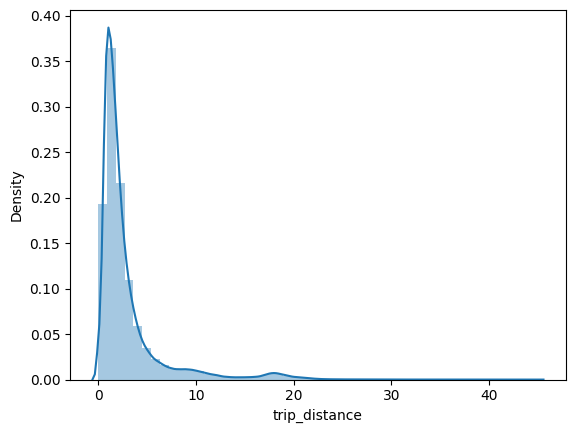

In [58]:
sns.distplot(data_2021_06['trip_distance'])

##### As we can see that data is not normal distribution and lookalike exponantial distribution.

In [59]:
sample_means = [data_2021_06.trip_distance.sample(30).mean() for i in range(1000) ]
sample_means = pd.Series(sample_means)

In [60]:
### original mean
print("Original mean {}".format(data_2021_06['trip_distance'].mean()))
### sampling means
print("Sampling mean {}".format(sample_means.mean()))

print("")
print("---"*25)
print("")

### original std deviation
print("Sampling standard deviation {}".format(sample_means.std()))
### sampling std deviation (σ/√n)
print("Sampling distribution’s standard deviation (standard error) σ/√n =  {}".format(sample_means.std()/np.sqrt(30)))

Original mean 2.9707847170470485
Sampling mean 2.9800096666666667

---------------------------------------------------------------------------

Sampling standard deviation 0.6700147198783258
Sampling distribution’s standard deviation (standard error) σ/√n =  0.12232739197928803


###### Sampling standard deviation always That value should be quite close to Sampling distribution’s standard deviation (standard error).

In [61]:
# sample_size = [3,10,30,50,100,120]
# plt.figure(figsize=(12,7))
# for i, sampl_size in enumerate(sample_size):
#     sam_mean = [data_2021_06.trip_distance.sample(sampl_size).mean() for i in range(100)]
#     plt.subplot(2,3,i+1)
#     sns.distplot(sam_mean, bins=25)
#     plt.title("Sample size: "+str(sampl_size))
# plt.tight_layout()
# plt.show()
    

#### As we can observe, the distribution graph for Sample Size 3 & 10 does not resemble Normal Distribution. Still, from the Sample Size 30 as the Sample Size increases, the Sample Distribution resembles Normal Distribution.

#### The mean commute time of 30000 employees (μ)= 36.6 (sample mean) + some margin of error. We can find this margin of error using the CLT (central limit theorem).

#### Let’s say we have the mean of 1000 trip sample is X¯=2.905510333333333 miles, and the Standard Deviation of the sample is S=0.6561064103765346 miles. Using CLT, we can infer that,

#### Sampling Distribution Mean(μₓ¯) = Population Mean(μ)
#### Sampling Distributions’ Standard Deviation = σ/√n ≈S/√n = 10/√1000 
#### Since Sampling Distribution is a Normal Distribution
#### P(μ-2 < 2.90 < μ+2) = 95.4%, we get this value by 1–2–3 Rule of Normal Distribution Curve.
#### P(μ-2 < 2.90 < μ+2) = P(2.90–2< μ < 2.90+2) = 95.4%


#### Now, we can say that there is a 95.4% probability that the Population Mean(μ) lies between (2.90–2, 2.90+2). In other words, we are 95.4% confident that the error in estimating the mean ≤ 2.

## Time Taken

In [62]:
counter = 0
for i in data_records:
  counter = counter + 1
  data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
  print("")    
  print("------------ {} -------------".format(data_name[counter-1]))
  print("")  
  print(end=" ")
  for j in range(0,100,10):
    print("{} perncentile is ".format(j),np.percentile(i['time_taken'],j))
  print("{} perncentile is ".format(100),np.percentile(i['time_taken'],100))


------------ data_2021_06 -------------

 0 perncentile is  -459.4
10 perncentile is  4.2
20 perncentile is  5.88
30 perncentile is  7.42
40 perncentile is  9.02
50 perncentile is  10.78
60 perncentile is  12.85
70 perncentile is  15.5
80 perncentile is  19.3
90 perncentile is  26.53
100 perncentile is  3129.48

------------ data_2021_07 -------------

 0 perncentile is  -2325.4
10 perncentile is  4.12
20 perncentile is  5.78
30 perncentile is  7.32
40 perncentile is  8.9
50 perncentile is  10.63
60 perncentile is  12.67
70 perncentile is  15.27
80 perncentile is  19.02
90 perncentile is  26.1
100 perncentile is  3018.62

------------ data_2021_08 -------------

 0 perncentile is  -5750.85
10 perncentile is  4.12
20 perncentile is  5.78
30 perncentile is  7.3
40 perncentile is  8.87
50 perncentile is  10.58
60 perncentile is  12.6
70 perncentile is  15.2
80 perncentile is  18.97
90 perncentile is  26.28
100 perncentile is  7081.27

------------ data_2022_06 -------------

 0 perncenti

In [63]:
counter = 0
for i in data_records:
  counter = counter + 1
  data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
  print("")    
  print("------------ {} -------------".format(data_name[counter-1]))
  print("")  
  print(end=" ")
  for j in range(90,100,1):
    print("{} perncentile is ".format(j),np.percentile(i['time_taken'],j))
  print("{} perncentile is ".format(100),np.percentile(i['time_taken'],100))


------------ data_2021_06 -------------

 90 perncentile is  26.53
91 perncentile is  27.73
92 perncentile is  29.13
93 perncentile is  30.78
94 perncentile is  32.77
95 perncentile is  35.27
96 perncentile is  38.52
97 perncentile is  42.87
98 perncentile is  49.08
99 perncentile is  60.05
100 perncentile is  3129.48

------------ data_2021_07 -------------

 90 perncentile is  26.1
91 perncentile is  27.3
92 perncentile is  28.68
93 perncentile is  30.32
94 perncentile is  32.27
95 perncentile is  34.63
96 perncentile is  37.63
97 perncentile is  41.55
98 perncentile is  47.05
99 perncentile is  56.55
100 perncentile is  3018.62

------------ data_2021_08 -------------

 90 perncentile is  26.28
91 perncentile is  27.55
92 perncentile is  29.02
93 perncentile is  30.73
94 perncentile is  32.83
95 perncentile is  35.35
96 perncentile is  38.5
97 perncentile is  42.43
98 perncentile is  47.63
99 perncentile is  56.23
100 perncentile is  7081.27

------------ data_2022_06 -------------

In [64]:
counter = 0
for i in data_records:
  counter = counter + 1
  data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
  print("") 
  print("------------ {} -------------".format(data_name[counter-1]))
  print(end=" ")
  print("") 
  for j in np.arange(0.0,1.0,0.1):
    print("{} perncetile is ".format(float(99+j)),np.percentile(i['time_taken'],float(99+j)))
print("{} perncetile is ".format(100),np.percentile(i['time_taken'],100))


------------ data_2021_06 -------------
 
99.0 perncetile is  60.05
99.1 perncetile is  61.8
99.2 perncetile is  63.85
99.3 perncetile is  66.23
99.4 perncetile is  69.12
99.5 perncetile is  72.82
99.6 perncetile is  78.22
99.7 perncetile is  87.97285000000149
99.8 perncetile is  552.4541999999899
99.9 perncetile is  1426.4

------------ data_2021_07 -------------
 
99.0 perncetile is  56.55
99.1 perncetile is  58.1
99.2 perncetile is  59.87
99.3 perncetile is  61.95
99.4 perncetile is  64.57
99.5 perncetile is  67.97
99.6 perncetile is  72.9029600000009
99.7 perncetile is  82.92
99.8 perncetile is  887.6701800000016
99.9 perncetile is  1425.38

------------ data_2021_08 -------------
 
99.0 perncetile is  56.23
99.1 perncetile is  57.62
99.2 perncetile is  59.23
99.3 perncetile is  61.13
99.4 perncetile is  63.53
99.5 perncetile is  66.53
99.6 perncetile is  70.88775999999605
99.7 perncetile is  79.25
99.8 perncetile is  630.8293800001032
99.9 perncetile is  1423.6709700000008

-----

In [65]:
# counter = 0
# plt.figure(figsize=(12,7))
# data_records = [data_2021_06,data_2021_07,data_2021_08,data_2022_06,data_2022_07,data_2022_08]
# for i in data_records:
#     data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
#     counter = counter + 1
#     plt.subplot(2,3,counter)
#     sns.distplot(i['time_taken'])
#     plt.axvline(i['time_taken'].mean(), color='red', linestyle='--',label='Average')
#     plt.axvline(i['time_taken'].median(), color='black', linestyle='-',label='Median')
#     plt.tight_layout() 
#     plt.title("{}".format(data_name[counter-1]))
#     plt.xlabel('Distances in Miles') 

In [66]:

# create 99% confidence interval
# for population mean weight
data_records = [data_2021_06,data_2021_07,data_2021_08,data_2022_06,data_2022_07,data_2022_08]
counter = 0
for i in data_records:
    counter = counter + 1
    data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
    print("{} ".format(data_name[counter-1]))
    print("{}".format(st.norm.interval(alpha=0.99,loc=np.mean(i['time_taken']),scale=st.sem(i['time_taken']))))
    print('')
    print("*"*50)
    print('')


data_2021_06 
(16.393984612653362, 16.59062703191625)

**************************************************

data_2021_07 
(16.20667380230527, 16.4067479754583)

**************************************************

data_2021_08 
(16.152007590288175, 16.352012034573686)

**************************************************

data_2022_06 
(342.7993707421728, 525.265232866928)

**************************************************

data_2022_07 
(16.65814465335351, 16.804218017206786)

**************************************************

data_2022_08 
(16.820035807827654, 16.964557394604565)

**************************************************



In [67]:
counter = 0
for i in data_records:
  counter = counter + 1
  data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
  print("") 
  print("------------ {} -------------".format(data_name[counter-1]))
  print(end=" ")
  print("")
  for j in range(50,105,5): 
    print("{} ------ :".format(j),(1-(len(i [(i ['time_taken']<j) & (i ['time_taken']>0)])/len(i)))*100)


------------ data_2021_06 -------------
 
50 ------ : 1.8893196440349147
55 ------ : 1.368806745876705
60 ------ : 1.0056848354411119
65 ------ : 0.7513924043153652
70 ------ : 0.5765340451256429
75 ------ : 0.4568105392136923
80 ------ : 0.377413396181403
85 ------ : 0.32486356616514556
90 ------ : 0.29092590363181126
95 ------ : 0.2663681826474029
100 ------ : 0.2515966211530274

------------ data_2021_07 -------------
 
50 ------ : 1.6045233979508189
55 ------ : 1.1177156498050067
60 ------ : 0.7966249385165214
65 ------ : 0.5891995948973716
70 ------ : 0.457154295434703
75 ------ : 0.37373768191110157
80 ------ : 0.322653377554305
85 ------ : 0.29218138537061566
90 ------ : 0.27022964496966617
95 ------ : 0.25679815635145653
100 ------ : 0.2477942221530971

------------ data_2021_08 -------------
 
50 ------ : 1.654663716119531
55 ------ : 1.1067948121894267
60 ------ : 0.7618389194476438
65 ------ : 0.5497180275209956
70 ------ : 0.42069448553607725
75 ------ : 0.3438992506898386

In [69]:
def fixed_time(df):
    return df[(df['time_taken']<75) & (df['time_taken']>0)]

In [70]:
data_2021_06 = fixed_time(data_2021_06)
data_2021_07 = fixed_time(data_2021_07)
data_2021_08 = fixed_time(data_2021_08)
data_2022_06 = fixed_time(data_2022_06)
data_2022_07 = fixed_time(data_2022_07)
data_2022_08 = fixed_time(data_2022_08)

In [ ]:
# counter = 0
# plt.figure(figsize=(12,7))
# data_records = [data_2021_06,data_2021_07,data_2021_08,data_2022_06,data_2022_07,data_2022_08]
# for i in data_records:
#     data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
#     counter = counter + 1
#     plt.subplot(2,3,counter)
#     sns.distplot(i['time_taken'])
#     plt.axvline(i['time_taken'].mean(), color='red', linestyle='--',label='Average')
#     plt.axvline(i['time_taken'].median(), color='black', linestyle='-',label='Median')
#     plt.tight_layout() 
#     plt.title("{}".format(data_name[counter-1]))
#     plt.xlabel('Distances in Miles') 

In [71]:
# counter = 0
# plt.figure(figsize=(6,3.5))
# data_records = [data_2021_06,data_2021_07,data_2021_08,data_2022_06,data_2022_07,data_2022_08]
# for i in data_records:
#     data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
#     counter = counter + 1
#     # plt.subplot(2,3,counter)
#     f, (ax_box, ax_dist) = plt.subplots(2)
#     sns.set(style="ticks")
#     sns.boxplot(data=i, x="time_taken",ax=ax_box)
#     ax_box.axvline(i['time_taken'].mean(), color='r', linestyle='--')
#     ax_box.axvline(i['time_taken'].median(), color='g', linestyle='-')
#     ax_box.axvline(i['time_taken'].mode().values[0], color='yellow', linestyle='-')
#     sns.histplot(data=i, x='time_taken', ax=ax_dist)
#     ax_dist.axvline(i['time_taken'].mean(), color='red', linestyle='--',label='Average')
#     ax_dist.axvline(i['time_taken'].median(), color='black', linestyle='-',label='Median')
#     ax_dist.axvline(i['time_taken'].mode().values[0], color='yellow', linestyle='-',label='Mode')
#     plt.title("{}".format(data_name[counter-1]))
#     plt.legend()
#     plt.tight_layout()
#     plt.show()


## Fare Amount

In [72]:
counter = 0
for i in data_records:
  counter = counter + 1
  data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
  print("")    
  print("------------ {} -------------".format(data_name[counter-1]))
  print("")  
  print(end=" ")
  for j in range(0,100,10):
    print("{} perncentile is ".format(j),np.percentile(i['fare_amount'],j))
  print("{} perncentile is ".format(100),np.percentile(i['fare_amount'],100))



------------ data_2021_06 -------------

 0 perncentile is  -624.0
10 perncentile is  5.0
20 perncentile is  6.0
30 perncentile is  7.0
40 perncentile is  8.0
50 perncentile is  9.5
60 perncentile is  11.0
70 perncentile is  12.5
80 perncentile is  16.0
90 perncentile is  24.0
100 perncentile is  624.0

------------ data_2021_07 -------------

 0 perncentile is  -550.0
10 perncentile is  5.0
20 perncentile is  6.0
30 perncentile is  7.0
40 perncentile is  8.0
50 perncentile is  9.5
60 perncentile is  11.0
70 perncentile is  13.0
80 perncentile is  16.5
90 perncentile is  25.5
100 perncentile is  1320.0

------------ data_2021_08 -------------

 0 perncentile is  -400.0
10 perncentile is  5.0
20 perncentile is  6.0
30 perncentile is  7.0
40 perncentile is  8.0
50 perncentile is  9.5
60 perncentile is  11.0
70 perncentile is  13.0
80 perncentile is  16.5
90 perncentile is  26.5
100 perncentile is  900.0

------------ data_2022_06 -------------

 0 perncentile is  -700.0
10 perncentile i

In [73]:
counter = 0
for i in data_records:
  counter = counter + 1
  data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
  print("")    
  print("------------ {} -------------".format(data_name[counter-1]))
  print("")  
  print(end=" ")
  for j in range(90,100,1):
    print("{} perncentile is ".format(j),np.percentile(i['fare_amount'],j))
  print("{} perncentile is ".format(100),np.percentile(i['fare_amount'],100))


------------ data_2021_06 -------------

 90 perncentile is  24.0
91 perncentile is  25.5
92 perncentile is  27.0
93 perncentile is  29.5
94 perncentile is  32.0
95 perncentile is  35.0
96 perncentile is  40.5
97 perncentile is  51.5
98 perncentile is  52.0
99 perncentile is  52.0
100 perncentile is  624.0

------------ data_2021_07 -------------

 90 perncentile is  25.5
91 perncentile is  27.0
92 perncentile is  29.0
93 perncentile is  31.5
94 perncentile is  34.0
95 perncentile is  38.5
96 perncentile is  46.0
97 perncentile is  52.0
98 perncentile is  52.0
99 perncentile is  52.0
100 perncentile is  1320.0

------------ data_2021_08 -------------

 90 perncentile is  26.5
91 perncentile is  28.5
92 perncentile is  30.5
93 perncentile is  33.0
94 perncentile is  36.0
95 perncentile is  41.0
96 perncentile is  51.0
97 perncentile is  52.0
98 perncentile is  52.0
99 perncentile is  53.5
100 perncentile is  900.0

------------ data_2022_06 -------------

 90 perncentile is  31.0
91 pe

In [74]:
counter = 0
for i in data_records:
  counter = counter + 1
  data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
  print("") 
  print("------------ {} -------------".format(data_name[counter-1]))
  print(end=" ")
  print("") 
  for j in np.arange(0.0,1.0,0.1):
    print("{} perncetile is ".format(float(99+j)),np.percentile(i['fare_amount'],float(99+j)))
print("{} perncetile is ".format(100),np.percentile(i['fare_amount'],100))


------------ data_2021_06 -------------
 
99.0 perncetile is  52.0
99.1 perncetile is  52.0
99.2 perncetile is  52.5
99.3 perncetile is  55.0
99.4 perncetile is  57.5
99.5 perncetile is  61.0
99.6 perncetile is  64.5
99.7 perncetile is  68.5
99.8 perncetile is  75.0
99.9 perncetile is  93.5

------------ data_2021_07 -------------
 
99.0 perncetile is  52.0
99.1 perncetile is  53.5
99.2 perncetile is  55.5
99.3 perncetile is  58.0
99.4 perncetile is  61.0
99.5 perncetile is  64.0
99.6 perncetile is  67.0
99.7 perncetile is  70.5
99.8 perncetile is  80.0
99.9 perncetile is  100.0

------------ data_2021_08 -------------
 
99.0 perncetile is  53.5
99.1 perncetile is  55.0
99.2 perncetile is  57.5
99.3 perncetile is  60.0
99.4 perncetile is  63.0
99.5 perncetile is  65.0
99.6 perncetile is  68.39491999998224
99.7 perncetile is  73.0
99.8 perncetile is  81.0
99.9 perncetile is  105.0

------------ data_2022_06 -------------
 
99.0 perncetile is  60.5
99.1 perncetile is  63.2
99.2 pernceti

In [75]:
# counter = 0
# plt.figure(figsize=(12,9))
# for i in data_records:
#     data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
#     counter = counter + 1
#     plt.subplot(2,3,counter)
#     # val = round((i['passenger_count'].value_counts()/len(i)*100),2)
#     # bars = plt.bar(i['passenger_count'].value_counts().index,val)
#     plt.boxplot(i['fare_amount'])
#     plt.tight_layout() 
#     plt.title("{}".format(data_name[counter-1]))
#     plt.xlabel('Number of passenger')
#     plt.ylabel('Total number of Customer in %')


In [77]:
counter = 0
for i in data_records:
  counter = counter + 1
  data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
  print("") 
  print("------------ {} -------------".format(data_name[counter-1]))
  print(end=" ")
  print("")
  for j in range(50,200,10): 
    print("{} ------ :".format(j),(1-(len(i [(i ['fare_amount']<j) & (i ['fare_amount']>0)])/len(i)))*100)


------------ data_2021_06 -------------
 
50 ------ : 3.6064398099490913
60 ------ : 1.0386992753810498
70 ------ : 0.7729958130008985
80 ------ : 0.6632061821939206
90 ------ : 0.6105455654664582
100 ------ : 0.5812978737075758
110 ------ : 0.5598791095407285
120 ------ : 0.5453660503724977
130 ------ : 0.5326625074873359
140 ------ : 0.526163020429804
150 ------ : 0.5214361207516061
160 ------ : 0.5131271174110164
170 ------ : 0.5095819426523707
180 ------ : 0.5071446350057962
190 ------ : 0.5054459054339433

------------ data_2021_07 -------------
 
50 ------ : 4.267753191001722
60 ------ : 1.1820454110816891
70 ------ : 0.8612895568501755
80 ------ : 0.7333369547503965
90 ------ : 0.6726162084209841
100 ------ : 0.6384607886106952
110 ------ : 0.6119698747709013
120 ------ : 0.5937387683362161
130 ------ : 0.5770703281673617
140 ------ : 0.568661695403605
150 ------ : 0.561704109886696
160 ------ : 0.5518816362157564
170 ------ : 0.5473052564372582
180 ------ : 0.5436218288106587


In [78]:
def fix_amount(df):
    return df[(df['fare_amount']<=100) & (df['fare_amount']> 0) ]

In [79]:
data_2021_06 = fix_amount(data_2021_06) 
data_2021_07 = fix_amount(data_2021_07)
data_2021_08 = fix_amount(data_2021_08)
data_2022_06 = fix_amount(data_2022_06)
data_2022_07 = fix_amount(data_2022_07)
data_2022_08 = fix_amount(data_2022_08)

In [80]:
# counter = 0
# plt.figure(figsize=(12,9))
# data_records = [data_2021_06,data_2021_07,data_2021_08,data_2021_06,data_2021_07,data_2021_08]
# for i in data_records:
#     data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
#     counter = counter + 1
#     plt.subplot(2,3,counter)
#     # val = round((i['passenger_count'].value_counts()/len(i)*100),2)
#     # bars = plt.bar(i['passenger_count'].value_counts().index,val)
#     plt.boxplot(i['fare_amount'])
#     plt.tight_layout() 
#     plt.title("{}".format(data_name[counter-1]))
#     plt.xlabel('Number of passenger')
#     plt.ylabel('Total number of Customer in %')

In [81]:
# import matplotlib.pylab as pylab
# counter = 0
# plt.figure(figsize=(12,7))
# data_records = [data_2021_06,data_2021_07,data_2021_08,data_2022_06,data_2022_07,data_2022_08]
# for i in data_records:
#     data_name =['data_2021_06','data_2021_07','data_2021_08','data_2022_06','data_2022_07','data_2022_08']
#     counter = counter + 1
#     plt.subplot(2,3,counter)
#     st.probplot(i['fare_amount'], dist="norm", plot=pylab);
#     plt.tight_layout() 
#     plt.title("{}".format(data_name[counter-1]))

In [82]:
# sns.kdeplot(data=data_2021_06['fare_amount'], cumulative=True , label = '2021_06', color = 'black' )
# sns.kdeplot(data=data_2021_07['fare_amount'], cumulative=True , label = '2021_07', color ='green');
# sns.kdeplot(data=data_2021_08['fare_amount'], cumulative=True , label = '2021_08', color ='red' );
# sns.kdeplot(data=data_2022_06['fare_amount'], cumulative=True , label = '2022_06', color ='yellow');
# sns.kdeplot(data=data_2022_07['fare_amount'], cumulative=True , label = '2022_07', color ='cyan');
# sns.kdeplot(data=data_2022_08['fare_amount'], cumulative=True , label = '2022_08', color ='blue');
# plt.legend()
# plt.show()

# EDA

In [84]:
outside_NYC = data_2021_06[((data_2021_06.PUlatitude <= 40.5774) | (data_2021_06.PUlongitude <= -74.15) | (data_2021_06.PUlatitude >= 40.9176) | (data_2021_06.PUlongitude >= -73.7004))]

In [85]:
import folium #open street map

In [86]:
coords_1 = 40.76439,  -73.87402
coords_2 = 37.7912,  -122.401

In [87]:
import geopy.distance
geopy.distance.geodesic(coords_1, coords_2).miles

2576.6749841388237

In [88]:
import gpxpy
from haversine import haversine, Unit
haversine ((40.76439,-73.87402), (37.7912,-122.401), unit='mi')

2570.412805880194

In [89]:
from sklearn.cluster import MiniBatchKMeans

In [91]:
# locations = outside_NYC[['PUlatitude', 'PUlongitude']][:10000]
# locationlist = locations.values.tolist()
# map = folium.Map(location=[40.73,-73.93], zoom_start=12)
# for point in range(0, len(locationlist)):
#     folium.Marker(locationlist[point]).add_to(map)
# map

In [92]:
data_2021_06

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,time_taken,speed(miles/hours),store_and_fwd_flag,PUlatitude,PUlongitude,DOlatitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2021-06-01 00:13:26,2021-06-01 00:17:14,1.0,0.90,3.80,14.21,N,36.262400,-86.713710,-28.606360,...,1,5.0,3.0,0.5,2.20,0.0,0.3,11.00,2.5,0.0
1,2021-05-31 23:57:36,2021-06-01 00:04:02,5.0,1.85,6.43,17.26,N,36.262400,-86.713710,-28.606360,...,1,7.5,0.5,0.5,2.82,0.0,0.3,14.12,2.5,0.0
2,2021-06-01 00:12:30,2021-06-01 00:16:25,2.0,0.90,3.92,13.78,N,36.262400,-86.713710,-28.606360,...,1,5.0,3.0,0.5,2.60,0.0,0.3,11.40,2.5,0.0
3,2021-06-01 00:35:02,2021-06-01 00:41:52,2.0,1.66,6.83,14.58,N,36.262400,-86.713710,-28.606360,...,1,7.5,0.5,0.5,0.00,0.0,0.3,11.30,2.5,0.0
4,2021-06-01 01:22:44,2021-06-01 01:28:20,1.0,1.90,5.60,20.36,N,36.262400,-86.713710,-28.606360,...,1,7.5,3.0,0.5,2.25,0.0,0.3,13.55,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2834259,2021-06-12 17:58:58,2021-06-12 18:05:26,1.0,1.22,6.47,11.31,N,40.716260,-74.012580,52.730034,...,2,6.5,0.0,0.5,0.00,0.0,0.3,9.80,2.5,0.0
2834260,2021-06-15 18:23:17,2021-06-15 18:32:48,1.0,1.60,9.52,10.08,N,37.791200,-122.401000,52.730034,...,1,9.0,3.5,0.5,3.30,0.0,0.3,16.60,2.5,0.0
2834261,2021-06-15 18:37:40,2021-06-15 18:52:56,1.0,3.00,15.27,11.79,N,52.730034,-8.739338,52.730034,...,2,13.5,1.0,0.5,0.00,0.0,0.3,15.30,0.0,0.0
2834262,2021-06-15 18:57:43,2021-06-15 19:06:55,1.0,1.40,9.20,9.13,N,52.730034,-8.739338,52.730034,...,1,8.0,1.0,0.5,2.45,0.0,0.3,12.25,0.0,0.0


In [94]:
#Deleting pickups / dropoff out of NYC
data_2021_06 = data_2021_06[(((data_2021_06.PUlatitude >= 40.5774) & (data_2021_06.PUlatitude <= 40.9176)) & ((data_2021_06.PUlongitude >= -74.15) & (data_2021_06.PUlongitude <= -73.7004)))]
data_2021_06 = data_2021_06[(((data_2021_06.DOlatitude >= 40.5774) & (data_2021_06.DOlatitude <= 40.9176)) & ((data_2021_06.DOlongitude >= -74.15) & (data_2021_06.DOlongitude <= -73.7004)))]

In [97]:
coords = data_2021_06[['PUlatitude', 'PUlongitude']].values
neighbours = []

def find_min_distance(cluster_centre, cluster_len):
    best_point = 0
    worst_point = 0
    more = []
    less = []
    min_dist = 1000
    for i in range(0,cluster_len):
        best_point = 0
        worst_point = 0
        for j in range(0,cluster_len):
            if j!=i:
                distance = gpxpy.geo.haversine_distance(cluster_centre[i][0], cluster_centre[i][1],cluster_centre[j][0], cluster_centre[j][1])
                min_dist = min(min_dist,distance/(1.60934*1000))
                if (distance/(1.60934*1000)) <= 2:
                    best_point +=1
                else:
                    worst_point += 1
        less.append(best_point)
        more.append(worst_point)
    neighbours.append(less)
    print ("On choosing a cluster size of ",cluster_len,"\nAvg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2):", np.ceil(sum(less)/len(less)),
           "\nAvg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2):", np.ceil(sum(more)/len(more)),
           "\nMin inter-cluster distance = ",min_dist,
           "\nMin inter-cluster distance in percentage= ",((np.ceil(sum(less)/len(less)))/cluster_len)*100,
           "\nMin outer--cluster distance in percentage= ",((np.ceil(sum(more)/len(more)))/cluster_len)*100,
           "\n---")
def find_cluster(increment):
    kmeans = MiniBatchKMeans(n_clusters=increment, batch_size=10000, random_state=42).fit(coords)
    data_2021_06['pickup_cluster'] = kmeans.predict(data_2021_06[['PUlatitude', 'PUlongitude']])
    cluster_centre = kmeans.cluster_centers_
    cluster_len = len(cluster_centre)
    return cluster_centre, cluster_len
for increment in range(10, 100, 10):
    cluster_centre, cluster_len = find_cluster(increment)
    find_min_distance(cluster_centre, cluster_len) 

On choosing a cluster size of  10 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 2.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 8.0 
Min inter-cluster distance =  1.0886603892164801 
Min inter-cluster distance in percentage=  20.0 
Min outer--cluster distance in percentage=  80.0 
---
On choosing a cluster size of  20 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 3.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 17.0 
Min inter-cluster distance =  0.6115650635383836 
Min inter-cluster distance in percentage=  15.0 
Min outer--cluster distance in percentage=  85.0 
---
On choosing a cluster size of  30 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 5.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 25.0 
Min inter-cluster distance =  2.260066367496277e-09 
Min inter-cluster distance in per

In [128]:
wcss = []
for i in range(10,100,5):
    kmeans = MiniBatchKMeans(n_clusters=i, batch_size=10000, random_state=42)
    kmeans.fit(coords)
    wcss.append(kmeans.inertia_)

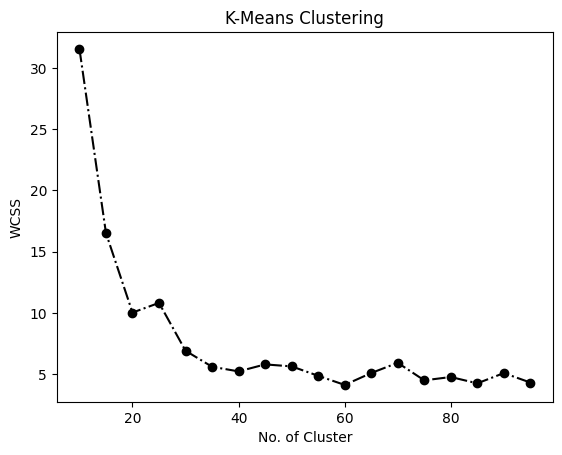

In [127]:
plt.plot(range(10,100,5), wcss, marker = 'o', linestyle='-.',color='black')
plt.xlabel("No. of Cluster")
plt.ylabel("WCSS")
plt.title("K-Means Clustering")
plt.show()

In [140]:
kmeans = MiniBatchKMeans(n_clusters=25, batch_size=10000,random_state=0).fit(coords)
data_2021_06['pickup_cluster'] = kmeans.predict(data_2021_06[['PUlatitude', 'PUlongitude']])

In [145]:
#Grouping the mounthly data by region
data_2021_06.rename(columns={'tpep_pickup_datetime':'time','trip_distance':'demand',},inplace=True)
data_2021_06['time'] = pd.to_datetime(data_2021_06['time'])
grouped_data_2021_06 = data_2021_06[["pickup_cluster", "time", "demand"]].groupby(by = ["pickup_cluster", "time"]).count()

In [168]:
#Cluster example
cluster = grouped_data_2021_06.loc[0]
#Resampling Data in region j into one hour step
cluster = cluster.resample('1h').sum() 
#Feature Engineering
cluster['Date time'] = cluster.index
cluster['Date time'] = pd.to_datetime(cluster['Date time'].dt.strftime('%Y-%m-%d %H'))
cluster['hour']=cluster['Date time'].dt.hour 
cluster['day']=cluster['Date time'].dt.day
cluster['dayofweek']=cluster['Date time'].dt.dayofweek  

In [171]:
cluster.head(10)

,demand,Date time,hour,day,dayofweek
time,,,,,
2021-06-01 00:00:00,2,2021-06-01 00:00:00,0,1,1
2021-06-01 01:00:00,0,2021-06-01 01:00:00,1,1,1
2021-06-01 02:00:00,0,2021-06-01 02:00:00,2,1,1
2021-06-01 03:00:00,0,2021-06-01 03:00:00,3,1,1
2021-06-01 04:00:00,1,2021-06-01 04:00:00,4,1,1
2021-06-01 05:00:00,1,2021-06-01 05:00:00,5,1,1
2021-06-01 06:00:00,6,2021-06-01 06:00:00,6,1,1
2021-06-01 07:00:00,10,2021-06-01 07:00:00,7,1,1
2021-06-01 08:00:00,28,2021-06-01 08:00:00,8,1,1


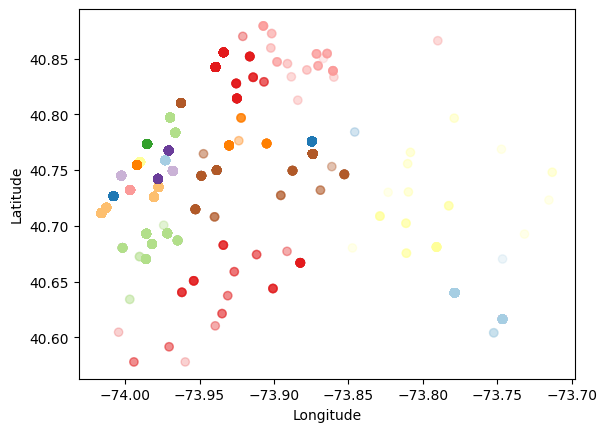

In [163]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(data_2021_06.PUlongitude.values[:100000], data_2021_06.PUlatitude.values[:100000],
            c=data_2021_06.pickup_cluster.values[:100000],cmap='Paired', alpha=0.2)
# ax.scatter(cluster_centers[0],cluster_centers[1])

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [ ]:
cluster_centers = kmeans.cluster_centers_
cluster_len = len(cluster_centers)
map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')
for i in range(cluster_len):
    folium.Marker(list((cluster_centers[i][0],cluster_centers[i][1])), popup=(str(cluster_centers[i][0])+str(cluster_centers[i][1]))).add_to(map_osm)
map_osm

## Timing binning

In [ ]:
interrupt

In [ ]:
def time_binninig(df):
    x = df[((df.DOlongitude >= -74.15) & (df.DOlongitude <= -73.7004) &\
                       (df.DOlatitude >= 40.5774) & (df.DOlatitude <= 40.9176)) & \
                       ((df.PUlongitude >= -74.15) & (df.PUlatitude >= 40.5774)& \
                       (df.PUlongitude <= -73.7004) & (df.PUlatitude <= 40.9176))]
    return x

In [ ]:
data_2021_06 = time_binninig (data_2021_06) 
data_2021_07 = time_binninig (data_2021_07)
data_2021_08 = time_binninig (data_2021_08)
data_2022_06 = time_binninig (data_2022_06)
data_2022_07 = time_binninig (data_2022_07)
data_2022_08 = time_binninig (data_2022_08)

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

In [ ]:
coords = data_2021_06[['PUlatitude', 'PUlongitude']]

wcss = [] 
for i in range(1, 100,5): 
    kmeans = MiniBatchKMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(coords) 
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 100, 5), wcss) 
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [ ]:
kmeans = MiniBatchKMeans(n_clusters=50, batch_size=10000,random_state=0).fit(coords)
data_2021_06['pickup_cluster'] = kmeans.predict(data_2021_06[['PUlatitude', 'PUlongitude']])

In [ ]:
time_bin = data_2021_06[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'time_taken', 'speed(miles/hours)', 'PUlatitude',
       'PUlongitude', 'DOlatitude', 'DOlongitude', 'pickup_cluster']]

In [ ]:
time_bin['year']  = [x.year for x in time_bin['tpep_pickup_datetime']]

In [ ]:
time_bin = time_bin[time_bin['year'] <= 2022]

In [ ]:
x = pd.to_datetime('2022-06-01 00:00:00') 

In [ ]:
time_bin ['time'] = ([(((i-x))) for i in time_bin['tpep_pickup_datetime']])


In [ ]:
time_bin['count'] = 1

In [ ]:
time_bin['Hour'] = pd.to_datetime(time_bin['tpep_pickup_datetime']).dt.hour
time_bin['Minute'] = pd.to_datetime(time_bin['tpep_pickup_datetime']).dt.minute

In [ ]:
time_bin['day'] = pd.to_datetime(time_bin['tpep_pickup_datetime']).dt.day

In [ ]:
keys = [pair for pair, df in time_bin.groupby(['Hour'])]
plt.plot(keys, time_bin.groupby(['Hour']).count()['count'])
plt.xticks(keys)
plt.grid()
plt.show()

In [ ]:
keys = [pair for pair, df in time_bin.groupby(['day'])]
plt.plot(keys, time_bin.groupby(['day']).count()['count'])
plt.xticks(keys)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
import datetime
import time

In [ ]:
x = datetime.datetime(2022,6,1,00,0,0)
time.mktime(x.timetuple())

In [ ]:
time_bin['tpep_pickup_datetime']

In [ ]:
def convert_to_unix(s):
    return time.mktime(datetime.datetime.strptime(str(s), "%Y-%m-%d %H:%M:%S").timetuple())

In [ ]:
time_bin['Unit_time'] = ([convert_to_unix(x) for x in time_bin['tpep_pickup_datetime']])

In [ ]:
tenminutewise_binned_unix_pickup_times = [(int((i-1654021800)/600)+33) for i in time_bin['Unit_time']]
time_bin['pickup_bins'] = np.array(tenminutewise_binned_unix_pickup_times)

In [ ]:
time_bin

In [ ]:
x = pd.to_datetime('2021-06-01 00:00:00') 

In [ ]:
time_bin ['time'] = ([(((i-x))) for i in time_bin['tpep_pickup_datetime']])

In [ ]:
time_bin.head()

In [ ]:
x = datetime.datetime(2021,6,1,00,0,0)
time.mktime(x.timetuple())

In [ ]:
tenminutewise_binned_unix_pickup_times = [(int((i-1622485800)/600)+33) for i in time_bin['Unit_time']]
time_bin['pickup_bins'] = np.array(tenminutewise_binned_unix_pickup_times)

In [ ]:
time_bin.head()

In [ ]:
june_2021_groupby = time_bin[['pickup_cluster','pickup_bins','trip_distance']].groupby(['pickup_cluster','pickup_bins']).count()

In [ ]:
def return_unq_pickup_bins(frame):
    values = []
    for i in range(0,40):
        new = frame[frame['pickup_cluster'] == i]
        list_unq = list(set(new['pickup_bins']))
        list_unq.sort()
        values.append(list_unq)
    return values

In [ ]:
june_2021_unique = return_unq_pickup_bins(time_bin)

In [ ]:
for i in range(40):
    print("for the ",i,"th cluster number of 10min intavels with zero pickups: ",4162 - len(set(june_2021_unique[i])))
    print('-'*60)

In [ ]:
#Visualising the clusters on a map
def plot_clusters(frame):
    city_long_border = (-74.03, -73.75)
    city_lat_border = (40.63, 40.85)
    fig, ax = plt.subplots(ncols=1, nrows=1)
    ax.scatter(frame.PUlatitude.values[:100000], frame.PUlatitude.values[:100000], s=10, lw=0,
               c=frame.pickup_cluster.values[:100000], cmap='tab20', alpha=0.2)
    ax.set_xlim(city_long_border)
    ax.set_ylim(city_lat_border)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.show()

plot_clusters(time_bin)